In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

c:\Users\Hitesh\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
stocks = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
stocks.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
stocks['Volume'] = stocks['Volume'].str.replace(",","").astype(float)
stocks['Close'] = stocks['Close'].str.replace(",","").astype(float)

In [5]:
stocks.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
stocks_without_date = stocks[['Open', 'High','Low','Close','Volume']]
stocks_scaled = pd.DataFrame(scaler.fit_transform(stocks_without_date))

c:\Users\Hitesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\Hitesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


<AxesSubplot:>

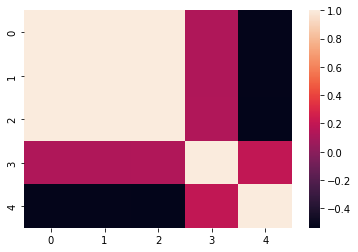

In [9]:
sns.heatmap(stocks_scaled.corr())

In [10]:
stocks_scaled = stocks_scaled.drop([1,2,4], axis=1)

In [13]:
def split_data(sequence, n_past, n_future):
    x,y = [], []
    for window_start in range(len(sequence)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if (future_end>len(sequence)):
            break
        past = sequence[window_start:past_end,:]
        future = sequence[past_end:future_end, -1]
        x.append(past)
        y.append(future)
    return np.array(x), np.array(y)

In [16]:
X,y = split_data(stocks_scaled.to_numpy(), 60, 1)

In [21]:
X.shape, y.shape

((1198, 60, 2), (1198, 1))

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [25]:
from tensorflow import keras

In [26]:
model = keras.Sequential([
    keras.layers.LSTM(612, input_shape=(60,2)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [27]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

In [28]:
model.fit(X_train, y_train, epochs=250, batch_size=32, verbose=2)

Epoch 1/250
30/30 - 22s - loss: 0.0520 - mae: 0.1522 - 22s/epoch - 718ms/step
Epoch 2/250
30/30 - 28s - loss: 0.0057 - mae: 0.0459 - 28s/epoch - 923ms/step
Epoch 3/250
30/30 - 16s - loss: 0.0031 - mae: 0.0284 - 16s/epoch - 532ms/step
Epoch 4/250
30/30 - 14s - loss: 0.0030 - mae: 0.0283 - 14s/epoch - 473ms/step
Epoch 5/250
30/30 - 14s - loss: 0.0027 - mae: 0.0304 - 14s/epoch - 473ms/step
Epoch 6/250
30/30 - 14s - loss: 0.0023 - mae: 0.0248 - 14s/epoch - 469ms/step
Epoch 7/250
30/30 - 14s - loss: 0.0018 - mae: 0.0217 - 14s/epoch - 482ms/step
Epoch 8/250
30/30 - 15s - loss: 0.0018 - mae: 0.0217 - 15s/epoch - 485ms/step
Epoch 9/250
30/30 - 15s - loss: 0.0021 - mae: 0.0288 - 15s/epoch - 487ms/step
Epoch 10/250
30/30 - 14s - loss: 0.0024 - mae: 0.0281 - 14s/epoch - 480ms/step
Epoch 11/250
30/30 - 14s - loss: 0.0015 - mae: 0.0197 - 14s/epoch - 481ms/step
Epoch 12/250
30/30 - 15s - loss: 0.0014 - mae: 0.0191 - 15s/epoch - 502ms/step
Epoch 13/250
30/30 - 15s - loss: 0.0014 - mae: 0.0186 - 15s/e

KeyboardInterrupt: 

In [29]:
predicted_values = model.predict(X_test)

8/8 [==============================] - 3s 224ms/step


In [30]:
from sklearn.metrics import r2_score

In [31]:
r2 = r2_score(y_test, predicted_values)

In [32]:
print(r2)

0.9932874957016172
